In [1]:
import re 
import pdfplumber

import csv

DATE_STRING = '2020-06-10'

outfile = 'covid_conjugate_0610.csv'
outfileh = open(outfile, 'w')
writer = csv.writer(outfileh)

writer.writerow(['facility','county', 'first_reported', 'start_date', 'cases', 'deaths', 'report_date'])

file = "../or_weekly_reports/COVID-19-Weekly-Report-%s-FINAL.pdf" % DATE_STRING
pdf = pdfplumber.open(file)


In [2]:
settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "words",
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}


In [3]:


pagenumber = 6

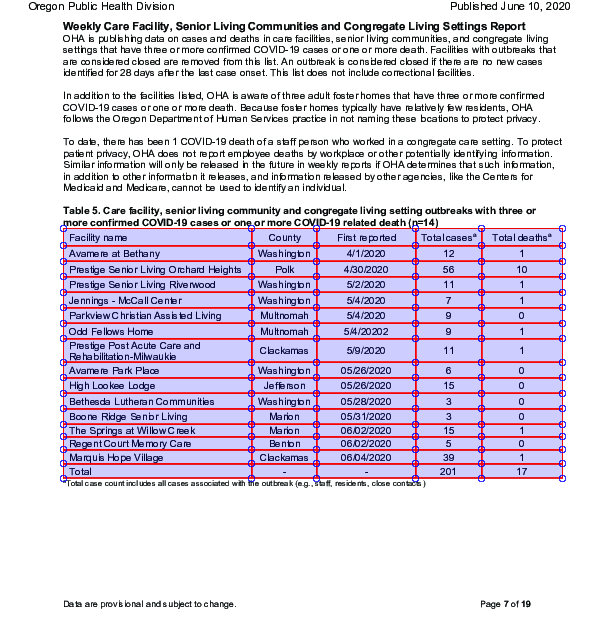

In [4]:
#im = pdf.pages[pagenumber].to_image()
width = pdf.pages[pagenumber].width
height = pdf.pages[pagenumber].height
box1 = (0, 150,  width, height)

cropped_page = pdf.pages[pagenumber].crop(box1) 
im = cropped_page.to_image()
im.debug_tablefinder()

In [7]:
table_found = cropped_page.extract_table(table_settings={})
result_count = len(table_found)
# Skip the header row
for i in range(1,result_count):
    this_row = table_found[i]

    if not this_row[0]:
        # hack for misread 
        print("Empty-ish row, continuing")
        continue
    if this_row[0]=='Total':
        continue
    print(len(this_row))
    assert len(this_row)==5
    print(this_row)
    this_row.append(DATE_STRING)
    writer.writerow(this_row)
    

5
['Avamere at Bethany', 'Washington', '4/1/2020', '12', '1']
5
['Prestige Senior Living Orchard Heights', 'Polk', '4/30/2020', '56', '10']
5
['Prestige Senior Living Riverwood', 'Washington', '5/2/2020', '11', '1']
5
['Jennings - McCall Center', 'Washington', '5/4/2020', '7', '1']
5
['Parkview Christian Assisted Living', 'Multnomah', '5/4/2020', '9', '0']
5
['Odd Fellows Home', 'Multnomah', '5/4/20202', '9', '1']
5
['Prestige Post Acute Care and \nRehabilitation-Milwaukie', 'Clackamas', '5/9/2020', '11', '1']
5
['Avamere Park Place', 'Washington', '05/26/2020', '6', '0']
5
['High Lookee Lodge', 'Jefferson', '05/26/2020', '15', '0']
5
['Bethesda Lutheran Communities', 'Washington', '05/28/2020', '3', '0']
5
['Boone Ridge Senior Living', 'Marion', '05/31/2020', '3', '0']
5
['The Springs at Willow Creek', 'Marion', '06/02/2020', '15', '1']
5
['Regent Court Memory Care', 'Benton', '06/02/2020', '5', '0']
5
['Marquis Hope Village', 'Clackamas', '06/04/2020', '39', '1']


In [6]:
## that's the end! In other reports there might be more. 

In [7]:
outfileh.close()
